In [1]:
# Import SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# Import datetime, pandas
import datetime as dt
import pandas as pd

In [16]:
# Import matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Establish connection to hawaii DB
engine = create_engine('sqlite:///../Resources/hawaii.sqlite')

In [4]:
# Reflect the database into ORM classes
Base = automap_base()
Base.prepare(autoload_with=engine)

# View the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# Create the session from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis
---
# I'm interested in seeing a visualization of the latest year's worth of precipitation in Hawaii.

To do this, I want to retrieve the latest year's worth of records from the measurement table. 
In the next four blocks, a query is designed to retrieve the last 12 months of data starting from the latest date in the dataset.

In [7]:
# Find the most recent date in the data set
# Query the dates in descending order, and return the first row
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [8]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [9]:
# Save the query for year's worth of records to an object
prcp = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= dt.date(2016, 8, 23), measurement.date <= dt.date(2017, 8, 23)).\
            order_by(measurement.date).all()
            
prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [13]:
# Load the query results into a pandas DataFrame and set the index to the date
prcp_df = pd.DataFrame(prcp)

# Rename the columns, set the index to the date, display resulting DataFrame
prcp_df.columns = ['date', 'prcp']
prcp_df = prcp_df.set_index('date')
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [14]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by= ['date'], ascending= True)
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


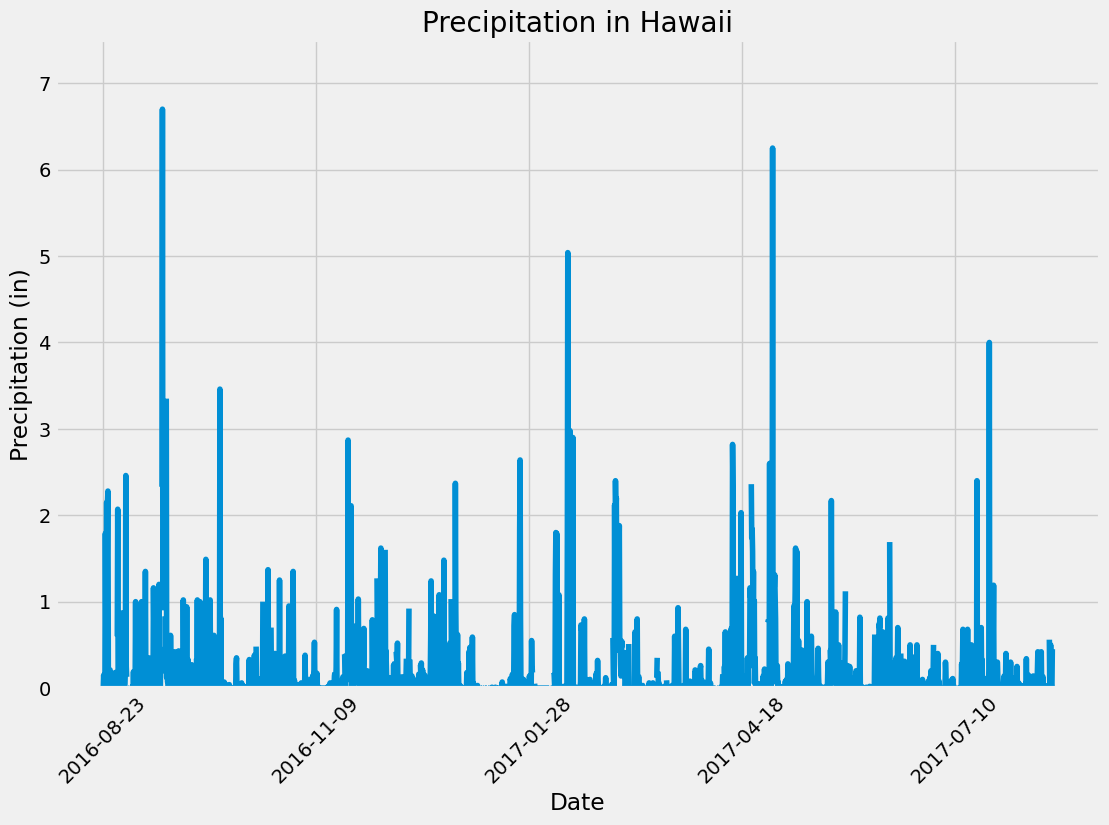

In [41]:
# Use Pandas Plotting with Matplotlib to plot the precipitaion in Hawaii
prcp_df.plot(legend=False, figsize= [12, 8])
plt.title('Precipitation in Hawaii')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.ylim(0, 7.5)
plt.xticks(rotation='45')
plt.grid(True)
plt.show()